[Low-income Americans can no longer afford rent, food, and transportation](http://www.vox.com/2016/3/30/11330832/low-income-households-cant-afford-basic-needs)

>A new Pew Charitable Trusts analysis of data from the Bureau of Labor Statistics shows that in 2013, low-income Americans spent a median of 6,897 on housing. In 2014, that rose to 9,178 — the biggest jump in housing spending for the 19-year period of data that Pew studied.

>The cost of other necessities, like transportation and food, also rose, albeit not as dramatically. 2014 was the first year that Pew studied in which median spending on these three categories was higher than the median income for those in the lower third of income groups.

# Try to recreate this plot

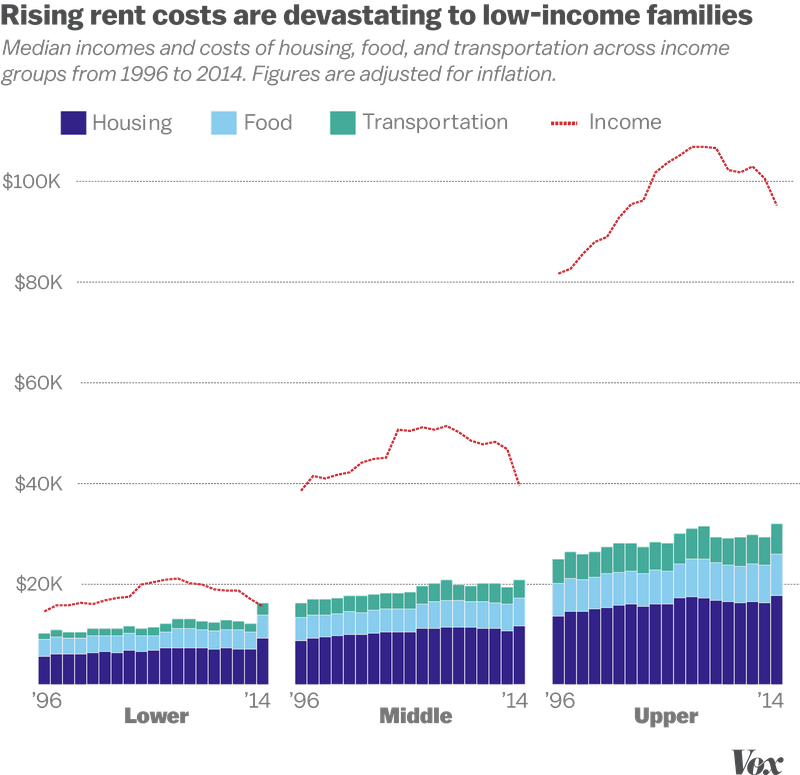

In [6]:
Image('https://cdn2.vox-cdn.com/thumbor/PBFeR5h6uDVbac3CSVzXSpZJkAE=/800x0/filters:no_upscale()/cdn0.vox-cdn.com/uploads/chorus_asset/file/6268393/chart.0.png')

# Load the data

In [386]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

%matplotlib inline

sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

In [387]:
url = "https://raw.githubusercontent.com/voxmedia/data-projects/master/vox-data/pew-household-expenditures-2016.csv"
raw_data = pd.read_csv(url)
raw_data.head()

,year,thirds,weighted_mean_total_expend,weighted_mean_food,weighted_mean_housing,weighted_mean_transportation,weighted_mean_healthcare,weighted_mean_entertainment,weighted_mean_apparal,weighted_mean_reading,...,median_food,median_housing,median_transportation,median_healthcare,median_entertainment,median_apparal,median_reading,median_retirement_pension,median_cash_contrib,median_income
0,1996,Lower Third,23465.69,4469.709,7748.817,4779.971,906.5408,992.0576,1022.189,90.83981,...,3167.614,5674.843,1208.842,0.00000,386.1579,402.9474,0,420.8672,0,14548.08
1,1997,Lower Third,26339.62,4969.511,9298.430,5092.749,1200.3450,1134.4780,1087.907,95.18034,...,3353.184,6136.958,1413.894,46.76302,462.1286,436.7694,0,501.3747,0,15696.40
2,1998,Lower Third,25917.10,4804.838,9145.672,4922.368,1136.4340,1189.4580,1066.689,92.84431,...,3174.551,5999.362,1201.116,10.76119,442.2290,382.1732,0,522.7584,0,15794.67
3,1999,Lower Third,26129.84,4719.575,8987.732,5239.441,1090.0910,1218.5830,1103.091,86.00095,...,3147.648,6141.948,1233.700,26.90297,467.2310,376.6416,0,593.6587,0,16141.78
4,2000,Lower Third,27817.75,4994.988,9332.954,5916.607,1200.1270,1290.1890,1113.315,81.42344,...,3412.361,6336.492,1484.495,78.74680,514.7571,367.4851,0,580.8434,0,15880.60


In [388]:
raw_data.dtypes

year                                  int64
thirds                               object
weighted_mean_total_expend          float64
weighted_mean_food                  float64
weighted_mean_housing               float64
weighted_mean_transportation        float64
weighted_mean_healthcare            float64
weighted_mean_entertainment         float64
weighted_mean_apparal               float64
weighted_mean_reading               float64
weighted_mean_retirement_pension    float64
weighted_mean_cash_contrib          float64
weighted_mean_income                float64
median_total_expend                 float64
median_food                         float64
median_housing                      float64
median_transportation               float64
median_healthcare                   float64
median_entertainment                float64
median_apparal                      float64
median_reading                      float64
median_retirement_pension           float64
median_cash_contrib             

In [389]:
raw_data.columns

Index([u'year', u'thirds', u'weighted_mean_total_expend',
       u'weighted_mean_food', u'weighted_mean_housing',
       u'weighted_mean_transportation', u'weighted_mean_healthcare',
       u'weighted_mean_entertainment', u'weighted_mean_apparal',
       u'weighted_mean_reading', u'weighted_mean_retirement_pension',
       u'weighted_mean_cash_contrib', u'weighted_mean_income',
       u'median_total_expend', u'median_food', u'median_housing',
       u'median_transportation', u'median_healthcare', u'median_entertainment',
       u'median_apparal', u'median_reading', u'median_retirement_pension',
       u'median_cash_contrib', u'median_income'],
      dtype='object')

# Clean the data

In [390]:
# Copy raw_data into a new df
df = raw_data.copy()
df.columns

Index([u'year', u'thirds', u'weighted_mean_total_expend',
       u'weighted_mean_food', u'weighted_mean_housing',
       u'weighted_mean_transportation', u'weighted_mean_healthcare',
       u'weighted_mean_entertainment', u'weighted_mean_apparal',
       u'weighted_mean_reading', u'weighted_mean_retirement_pension',
       u'weighted_mean_cash_contrib', u'weighted_mean_income',
       u'median_total_expend', u'median_food', u'median_housing',
       u'median_transportation', u'median_healthcare', u'median_entertainment',
       u'median_apparal', u'median_reading', u'median_retirement_pension',
       u'median_cash_contrib', u'median_income'],
      dtype='object')

In [391]:
# Convert "thirds" column to category
df['thirds'] = df['thirds'].astype('category')

In [392]:
df.dtypes

year                                   int64
thirds                              category
weighted_mean_total_expend           float64
weighted_mean_food                   float64
weighted_mean_housing                float64
weighted_mean_transportation         float64
weighted_mean_healthcare             float64
weighted_mean_entertainment          float64
weighted_mean_apparal                float64
weighted_mean_reading                float64
weighted_mean_retirement_pension     float64
weighted_mean_cash_contrib           float64
weighted_mean_income                 float64
median_total_expend                  float64
median_food                          float64
median_housing                       float64
median_transportation                float64
median_healthcare                    float64
median_entertainment                 float64
median_apparal                       float64
median_reading                       float64
median_retirement_pension            float64
median_cas

In [393]:
df.columns[2:]

Index([u'weighted_mean_total_expend', u'weighted_mean_food',
       u'weighted_mean_housing', u'weighted_mean_transportation',
       u'weighted_mean_healthcare', u'weighted_mean_entertainment',
       u'weighted_mean_apparal', u'weighted_mean_reading',
       u'weighted_mean_retirement_pension', u'weighted_mean_cash_contrib',
       u'weighted_mean_income', u'median_total_expend', u'median_food',
       u'median_housing', u'median_transportation', u'median_healthcare',
       u'median_entertainment', u'median_apparal', u'median_reading',
       u'median_retirement_pension', u'median_cash_contrib', u'median_income'],
      dtype='object')

In [394]:
# Save weighted_mean values in a separate dataframe
weighted_mean = df[['weighted_mean_total_expend', 'weighted_mean_food', 'weighted_mean_housing', 'weighted_mean_transportation', 
    'weighted_mean_healthcare', 'weighted_mean_entertainment', 'weighted_mean_apparal', 'weighted_mean_reading',
    'weighted_mean_retirement_pension', 'weighted_mean_cash_contrib', 'weighted_mean_income']].copy()

In [395]:
# We'll be looking at median values for now
df = df[['thirds','median_total_expend', 'median_food','median_housing', 'median_transportation', 'median_healthcare',
         'median_entertainment', 'median_apparal', 'median_reading','median_retirement_pension',
         'median_cash_contrib', 'median_income']]

df

,thirds,median_total_expend,median_food,median_housing,median_transportation,median_healthcare,median_entertainment,median_apparal,median_reading,median_retirement_pension,median_cash_contrib,median_income
0,Lower Third,16186.45,3167.614,5674.843,1208.842,0.00000,386.1579,402.9474,0.00000,420.8672,0.00000,14548.08
1,Lower Third,17045.12,3353.184,6136.958,1413.894,46.76302,462.1286,436.7694,0.00000,501.3747,0.00000,15696.40
2,Lower Third,16194.86,3174.551,5999.362,1201.116,10.76119,442.2290,382.1732,0.00000,522.7584,0.00000,15794.67
3,Lower Third,16469.64,3147.648,6141.948,1233.700,26.90297,467.2310,376.6416,0.00000,593.6587,0.00000,16141.78
4,Lower Third,17796.78,3412.361,6336.492,1484.495,78.74680,514.7571,367.4851,0.00000,580.8434,0.00000,15880.60
5,Lower Third,17619.35,3320.342,6412.185,1423.004,0.00000,479.4166,339.9231,0.00000,647.9749,0.00000,16738.64
6,Lower Third,17852.68,3303.402,6403.517,1353.690,24.91778,465.9622,304.9294,0.00000,681.0090,0.00000,17162.80
7,Lower Third,17726.51,3239.312,6837.439,1495.067,0.00000,463.4707,254.1614,0.00000,667.7969,0.00000,17442.45
8,Lower Third,17417.29,3162.359,6510.437,1542.070,0.00000,452.4605,209.2021,0.00000,814.3961,0.00000,19867.88
9,Lower Third,17401.50,3074.680,6716.992,1560.991,0.00000,463.5671,236.5138,0.00000,819.7566,0.00000,20316.07


In [396]:
x = range(1996, 2015)
df.index = 3*x

In [397]:
df['housing+food'] = df['median_housing'] + df['median_food']
df['housing+food+transport'] = df['median_housing'] + df['median_food'] + df['median_transportation']
df

,thirds,median_total_expend,median_food,median_housing,median_transportation,median_healthcare,median_entertainment,median_apparal,median_reading,median_retirement_pension,median_cash_contrib,median_income,housing+food,housing+food+transport
1996,Lower Third,16186.45,3167.614,5674.843,1208.842,0.00000,386.1579,402.9474,0.00000,420.8672,0.00000,14548.08,8842.457,10051.299
1997,Lower Third,17045.12,3353.184,6136.958,1413.894,46.76302,462.1286,436.7694,0.00000,501.3747,0.00000,15696.40,9490.142,10904.036
1998,Lower Third,16194.86,3174.551,5999.362,1201.116,10.76119,442.2290,382.1732,0.00000,522.7584,0.00000,15794.67,9173.913,10375.029
1999,Lower Third,16469.64,3147.648,6141.948,1233.700,26.90297,467.2310,376.6416,0.00000,593.6587,0.00000,16141.78,9289.596,10523.296
2000,Lower Third,17796.78,3412.361,6336.492,1484.495,78.74680,514.7571,367.4851,0.00000,580.8434,0.00000,15880.60,9748.853,11233.348
2001,Lower Third,17619.35,3320.342,6412.185,1423.004,0.00000,479.4166,339.9231,0.00000,647.9749,0.00000,16738.64,9732.527,11155.531
2002,Lower Third,17852.68,3303.402,6403.517,1353.690,24.91778,465.9622,304.9294,0.00000,681.0090,0.00000,17162.80,9706.919,11060.609
2003,Lower Third,17726.51,3239.312,6837.439,1495.067,0.00000,463.4707,254.1614,0.00000,667.7969,0.00000,17442.45,10076.751,11571.818
2004,Lower Third,17417.29,3162.359,6510.437,1542.070,0.00000,452.4605,209.2021,0.00000,814.3961,0.00000,19867.88,9672.796,11214.866
2005,Lower Third,17401.50,3074.680,6716.992,1560.991,0.00000,463.5671,236.5138,0.00000,819.7566,0.00000,20316.07,9791.672,11352.663


In [398]:
# Create three data frames for lower, middle and highest thirds. Reset index and drop old one.
lower = df[df['thirds'] == 'Lower Third'].reset_index(drop=True)
middle = df[df['thirds'] == 'Middle Third'].reset_index(drop=True)
highest = df[df['thirds'] == 'Highest Third'].reset_index(drop=True)

# Set index to years
lower.index = range(1996, 2015)
middle.index = range(1996, 2015)
highest.index = range(1996, 2015)

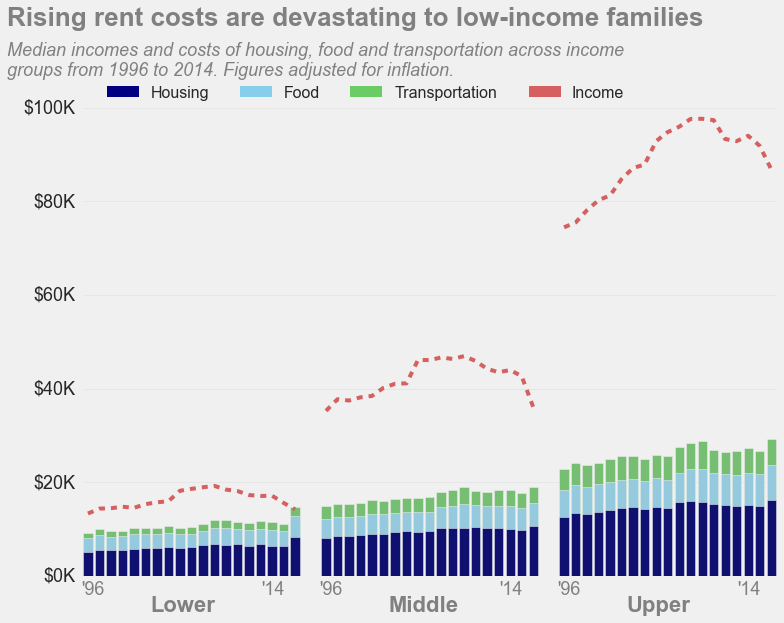

In [403]:
# ==== Design the figure ==== #

# Set general plot properties
sns.set_context({"figure.figsize": (3, 8)})
sns.set_color_codes(palette='muted')
fig, ax = plt.subplots(figsize=(11, 8))
ax.grid(True,linestyle='-',color='0.9')
ax.set_ylim([0,df['median_income'].max()])
ax.axes.get_xaxis().set_visible(False)
ylim = df['median_income'].max() + 10000

# Bigger font sizes for plots
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('labelsize: large')

# ==== Make legend ==== #

leg1 = plt.Rectangle((0,0),1,1,fc="navy", edgecolor = 'none')
leg2 = plt.Rectangle((0,0),1,1,fc='skyblue',  edgecolor = 'none')
leg3 = plt.Rectangle((0,0),1,1,fc='g', edgecolor='none')
leg4 = plt.Rectangle((0,0),1,1,fc='r', edgecolor='none')

l = plt.legend([leg1, leg2, leg3, leg4], ['Housing', 'Food', 'Transportation', 'Income'],
               bbox_to_anchor=(.8,1.01), ncol = 4, prop={'size':16})
l.draw_frame(False)

# Format y axis ticks
def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%iK' % (x*1e-3)
formatter = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(formatter)

# ==== Plot the data ==== #

# Lower plot
ax1=fig.add_subplot(131)
# Bar 1 - background - "total" (top) series
top_plot = sns.barplot(x = lower.index, y = lower['housing+food+transport'], color='g')
# Bar 2 - overlay - "middle" series
middle_plot = sns.barplot(x = lower.index, y = lower['housing+food'], color = "skyblue")
# Bar 3 - overlay - "bottom" series
bottom_plot = sns.barplot(x = lower.index, y = lower['median_housing'], color = "navy")
# Line
income_line = plt.plot(lower['median_income'],'--', color='r')
# Set axes
ax1.set_ylim([0,ylim])
ax1.axes.get_yaxis().set_visible(False)
ax1.set_axis_off()
plt.xticks(rotation=90)

# Middle plot
ax2=fig.add_subplot(132)
top_plot = sns.barplot(x = middle.index, y = middle['housing+food+transport'], color='g')
# Bar 2 - overlay - "middle" series
middle_plot = sns.barplot(x = middle.index, y = middle['housing+food'], color = "skyblue")
# Bar 3 - overlay - "bottom" series
bottom_plot = sns.barplot(x = middle.index, y = middle['median_housing'], color = "navy")
# Line
income_line = plt.plot(middle['median_income'],'--', color='r')
# Set axes
ax2.set_ylim([0,ylim])
ax2.axes.get_yaxis().set_visible(False)
ax2.set_axis_off()
plt.xticks(rotation=90)

# Highest plot
ax3=fig.add_subplot(133)
top_plot = sns.barplot(x = highest.index, y = highest['housing+food+transport'], color='g')
# Bar 2 - overlay - "middle" series
middle_plot = sns.barplot(x = highest.index, y = highest['housing+food'], color = "skyblue")
# Bar 3 - overlay - "bottom" series
bottom_plot = sns.barplot(x = highest.index, y = highest['median_housing'], color = "navy")
# Line
income_line = plt.plot(highest['median_income'],'--', color='r')
# Set axes
ax3.set_ylim([0,ylim])
ax3.axes.get_yaxis().set_visible(False)
ax3.set_axis_off()
plt.xticks(rotation=90)


# ==== Add text ==== #

# Title
ax.annotate("Rising rent costs are devastating to low-income families",
            (0,0), (-75, 550), textcoords='offset points', color='gray', fontsize=26, fontweight='heavy')

# Subtitle
ax.annotate("Median incomes and costs of housing, food and transportation across income",
            (0,0), (-75, 520), textcoords='offset points', color='gray', fontsize=18, style='italic')
ax.annotate("groups from 1996 to 2014. Figures adjusted for inflation.",
            (0,0), (-75, 500), textcoords='offset points', color='gray', fontsize=18, style='italic')

# Plot 1 annotations
ax1.annotate("'96", (0,0), (0, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax1.annotate("'14", (0,0), (180, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax1.annotate("Lower", (0,0), (70, -20), xycoords='axes fraction', textcoords='offset points',
            va='top', color='gray', fontsize=22, fontweight='bold')

# Plot 2 annotations
ax2.annotate("'96", (0,0), (0, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax2.annotate("'14", (0,0), (180, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax2.annotate("Middle", (0,0), (70, -20), xycoords='axes fraction', textcoords='offset points',
            va='top', color='gray', fontsize=22, fontweight='bold')

# Plot 3 annotations
ax3.annotate("'96", (0,0), (0, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax3.annotate("'14", (0,0), (180, -5), xycoords='axes fraction', textcoords='offset points',
             va='top', color='gray')
ax3.annotate("Upper", (0,0), (70, -20), xycoords='axes fraction', textcoords='offset points',
            va='top', color='gray', fontsize=22, fontweight='bold')

fig.tight_layout()
fig.savefig("/Users/Will/personal-website/assets/2016-05-26-fig3.png")